# 라이브러리 가져오기

In [1]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#csv는 엑셀과 달리 , 를 통해 데이터를 구분

# 데이터 가져오기

In [2]:
row_data = []
wave_num = []
time = []
# mode r -> 읽기 모드이다
#csv의 행단위로 데이터를 출력
#각 line은 ㅣist형식으로 되어있다
#newline = '' 데이터가 띄어쓰기 없이 들어간다
#read solution sequence -> 즉 example_solution을 읽어드림
with open('CH#A_RECIPE01_'+str(1)+'.csv', mode= 'r', newline = '') as Data_set:    
    swic = 0
    count = 1
    EPDTime_str = ''
    reader = csv.reader(Data_set)
    
    for row in reader:
        if swic == 0 :    
            EPDTime_str = row[0]
            temp_EPDTime=float(EPDTime_str[11:]) #37.6492
            EPDTime = int(temp_EPDTime*10)
            EPDTime
            swic += 1 
            continue
        elif swic == 1: #ScanTime 189.93, 189.94 ....
            wave_num = row[1:]
            wave_num =list(map(float, wave_num))
            swic +=1
            continue
        else:
            #print(row[0]) #0행의 숫자들 
            time.append(int(count))
            count +=1
            row_data.append(list(map(float, row[1:])))
    print('#########################################################################')
    print(time[600:]) #612

#########################################################################
[601, 602, 603, 604, 605, 606, 607, 608, 609]


In [3]:
len(row_data)

609

In [4]:
print(row_data[1])

[484.4909, 484.4909, 484.4909, 425.9775, 437.6802, 421.2964, 381.5073, 430.6586, 404.9127, 430.6586, 428.318, 416.6154, 428.318, 369.8047, 355.7614, 411.9343, 451.7234, 395.5505, 470.4477, 482.1504, 407.2532, 479.8098, 465.7666, 521.9395, 540.6638, 479.8098, 458.745, 496.1936, 531.3016, 454.0639, 491.5125, 517.2584, 484.4909, 526.6205, 535.9827, 575.7718, 596.8366, 486.8314, 543.0043, 552.3665, 543.0043, 617.9014, 617.9014, 489.172, 543.0043, 606.1987, 578.1123, 566.4097, 571.0907, 550.0259, 540.6638, 564.0691, 552.3665, 559.3881, 557.0475, 491.5125, 552.3665, 559.3881, 545.3448, 472.7882, 517.2584, 559.3881, 498.5341, 599.1771, 533.6422, 479.8098, 564.0691, 568.7502, 550.0259, 599.1771, 531.3016, 526.6205, 561.7286, 552.3665, 543.0043, 550.0259, 514.9178, 535.9827, 559.3881, 524.28, 543.0043, 533.6422, 514.9178, 557.0475, 496.1936, 610.8798, 545.3448, 606.1987, 592.1555, 486.8314, 437.6802, 566.4097, 486.8314, 531.3016, 531.3016, 585.1339, 578.1123, 550.0259, 568.7502, 582.7934, 603.8

# 분석을 위한 파장 - 시간 데이터프레임 생성

In [5]:
Row_df = pd.DataFrame(data = row_data, columns = wave_num)
Row_df.index = np.arange(1,len(Row_df)+1)
Row_df

,189.88,190.26,190.65,191.03,191.42,191.80,192.19,192.57,192.96,193.34,...,890.15,890.45,890.74,891.04,891.33,891.63,891.92,892.22,892.51,892.80
1,589.8150,589.8150,589.8150,475.1288,409.5938,383.8479,470.4477,390.8695,381.5073,367.4641,...,599.1771,599.1771,610.8798,594.4961,636.6257,613.2203,578.1123,620.2419,561.7286,535.9827
2,484.4909,484.4909,484.4909,425.9775,437.6802,421.2964,381.5073,430.6586,404.9127,430.6586,...,554.7070,608.5393,554.7070,500.8746,543.0043,617.9014,613.2203,568.7502,535.9827,566.4097
3,531.3016,531.3016,531.3016,418.9559,360.4425,414.2748,449.3828,444.7018,416.6154,423.6370,...,620.2419,573.4313,634.2852,573.4313,573.4313,589.8150,594.4961,594.4961,603.8582,545.3448
4,526.6205,526.6205,526.6205,514.9178,421.2964,475.1288,461.0855,351.0804,379.1668,397.8911,...,554.7070,582.7934,603.8582,571.0907,624.9230,594.4961,585.1339,566.4097,580.4529,547.6854
5,507.8962,507.8962,507.8962,519.5989,411.9343,456.4044,425.9775,404.9127,402.5721,369.8047,...,557.0475,601.5177,543.0043,610.8798,624.9230,592.1555,552.3665,557.0475,650.6689,566.4097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,538.3232,538.3232,538.3232,416.6154,362.7831,425.9775,432.9991,440.0207,418.9559,407.2532,...,2080.7360,3396.1170,5612.6040,7190.1250,7194.8070,6373.2790,6136.8850,6274.9760,5708.5660,5298.9730
606,554.7070,554.7070,554.7070,425.9775,383.8479,425.9775,411.9343,388.5289,360.4425,411.9343,...,2071.3740,3506.1230,5717.9290,7140.9750,7330.5580,6361.5760,6218.8030,6207.1010,5633.6690,5385.5730
607,489.1720,489.1720,489.1720,393.2100,423.6370,435.3396,407.2532,379.1668,409.5938,418.9559,...,2036.2660,3438.2470,5687.5020,7318.8550,7529.5030,6445.8350,5963.6850,6099.4360,5650.0530,5334.0810
608,505.5557,505.5557,505.5557,472.7882,423.6370,390.8695,454.0639,489.1720,400.2316,397.8911,...,1907.5370,3372.7120,5191.3080,6731.3810,6649.4620,5933.2580,5511.9610,5767.0800,5121.0920,5034.4920


# 추후 CNN을 위한 wave 별 intensity list 데이터 프레임 만들기

In [6]:
col_data = []
for _ in range(0, len(row_data[0])):
    col_data.append([])

In [7]:
len(col_data)

2048

In [8]:
for num in range (0, len(row_data[0])): #2000 -> wave
    for i in range(0 ,len(row_data)): # 600 -> time
        col_data[num].append(row_data[i][num]) # row = [[time 1 해당 180,181,182],
                                                          #[time 2 해당 180,181,182]]

In [9]:
col_data[2][:10]

[589.815,
 484.4909,
 531.3016,
 526.6205,
 507.8962,
 463.4261,
 496.1936,
 507.8962,
 533.6422,
 564.0691]

In [10]:
print(len(wave_num), len(col_data))
wave_num[:10]

2048 2048


[189.88, 190.26, 190.65, 191.03, 191.42, 191.8, 192.19, 192.57, 192.96, 193.34]

In [204]:
Data_set = list(zip(wave_num,col_data))
print(Data_set[1])

(190.26, [589.815, 484.4909, 531.3016, 526.6205, 507.8962, 463.4261, 496.1936, 507.8962, 533.6422, 564.0691, 468.1071, 479.8098, 463.4261, 463.4261, 547.6854, 519.5989, 461.0855, 559.3881, 491.5125, 468.1071, 557.0475, 505.5557, 458.745, 454.0639, 552.3665, 491.5125, 543.0043, 613.2203, 543.0043, 531.3016, 507.8962, 538.3232, 550.0259, 535.9827, 470.4477, 526.6205, 538.3232, 545.3448, 498.5341, 517.2584, 512.5773, 535.9827, 519.5989, 470.4477, 543.0043, 512.5773, 491.5125, 475.1288, 489.172, 472.7882, 496.1936, 550.0259, 554.707, 482.1504, 491.5125, 493.853, 514.9178, 468.1071, 432.9991, 514.9178, 440.0207, 503.2152, 514.9178, 510.2368, 519.5989, 472.7882, 533.6422, 482.1504, 596.8366, 517.2584, 435.3396, 477.4693, 524.28, 547.6854, 430.6586, 507.8962, 500.8746, 533.6422, 496.1936, 491.5125, 500.8746, 463.4261, 493.853, 531.3016, 540.6638, 461.0855, 507.8962, 514.9178, 510.2368, 510.2368, 528.9611, 561.7286, 510.2368, 517.2584, 578.1123, 550.0259, 554.707, 468.1071, 496.1936, 526.6205,

In [12]:
df = pd.DataFrame(data = Data_set, columns=["wave","intensity"])
df.index = np.arange(1,len(df)+1)
df # index = time -1 

,wave,intensity
1,189.88,"[589.815, 484.4909, 531.3016, 526.6205, 507.89..."
2,190.26,"[589.815, 484.4909, 531.3016, 526.6205, 507.89..."
3,190.65,"[589.815, 484.4909, 531.3016, 526.6205, 507.89..."
4,191.03,"[475.1288, 425.9775, 418.9559, 514.9178, 519.5..."
5,191.42,"[409.5938, 437.6802, 360.4425, 421.2964, 411.9..."
...,...,...
2044,891.63,"[613.2203, 617.9014, 589.815, 594.4961, 592.15..."
2045,891.92,"[578.1123, 613.2203, 594.4961, 585.1339, 552.3..."
2046,892.22,"[620.2419, 568.7502, 594.4961, 566.4097, 557.0..."
2047,892.51,"[561.7286, 535.9827, 603.8582, 580.4529, 650.6..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 1 to 2048
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wave       2048 non-null   float64
 1   intensity  2048 non-null   object 
dtypes: float64(1), object(1)
memory usage: 48.0+ KB


In [123]:
df['intensity'][4]

[475.1288,
 425.9775,
 418.9559,
 514.9178,
 519.5989,
 456.4044,
 449.3828,
 461.0855,
 411.9343,
 449.3828,
 505.5557,
 521.9395,
 411.9343,
 451.7234,
 440.0207,
 472.7882,
 430.6586,
 454.0639,
 400.2316,
 421.2964,
 472.7882,
 390.8695,
 423.637,
 507.8962,
 404.9127,
 411.9343,
 360.4425,
 428.318,
 388.5289,
 477.4693,
 409.5938,
 421.2964,
 442.3612,
 465.7666,
 416.6154,
 404.9127,
 428.318,
 461.0855,
 468.1071,
 442.3612,
 423.637,
 479.8098,
 409.5938,
 411.9343,
 423.637,
 440.0207,
 435.3396,
 397.8911,
 442.3612,
 442.3612,
 442.3612,
 475.1288,
 514.9178,
 456.4044,
 484.4909,
 463.4261,
 435.3396,
 437.6802,
 454.0639,
 421.2964,
 404.9127,
 397.8911,
 435.3396,
 435.3396,
 428.318,
 463.4261,
 435.3396,
 395.5505,
 416.6154,
 449.3828,
 421.2964,
 432.9991,
 407.2532,
 428.318,
 442.3612,
 376.8263,
 498.5341,
 447.0423,
 451.7234,
 416.6154,
 454.0639,
 491.5125,
 468.1071,
 432.9991,
 414.2748,
 461.0855,
 447.0423,
 428.318,
 449.3828,
 440.0207,
 458.745,
 428.318

# label을 데이터 프레임에 추가

In [15]:
label = []
for num in range (0,len(df['intensity'][1])):
    if(num < EPDTime):
        label.append(0)
    else:
        label.append(1)
label[EPDTime-2:EPDTime+5]

[0, 0, 1, 1, 1, 1, 1]

In [16]:
print(len(label))

609


In [17]:
Row_df #Row_df = pd.DataFrame(data = row_data, columns = wave_num)

,189.88,190.26,190.65,191.03,191.42,191.80,192.19,192.57,192.96,193.34,...,890.15,890.45,890.74,891.04,891.33,891.63,891.92,892.22,892.51,892.80
1,589.8150,589.8150,589.8150,475.1288,409.5938,383.8479,470.4477,390.8695,381.5073,367.4641,...,599.1771,599.1771,610.8798,594.4961,636.6257,613.2203,578.1123,620.2419,561.7286,535.9827
2,484.4909,484.4909,484.4909,425.9775,437.6802,421.2964,381.5073,430.6586,404.9127,430.6586,...,554.7070,608.5393,554.7070,500.8746,543.0043,617.9014,613.2203,568.7502,535.9827,566.4097
3,531.3016,531.3016,531.3016,418.9559,360.4425,414.2748,449.3828,444.7018,416.6154,423.6370,...,620.2419,573.4313,634.2852,573.4313,573.4313,589.8150,594.4961,594.4961,603.8582,545.3448
4,526.6205,526.6205,526.6205,514.9178,421.2964,475.1288,461.0855,351.0804,379.1668,397.8911,...,554.7070,582.7934,603.8582,571.0907,624.9230,594.4961,585.1339,566.4097,580.4529,547.6854
5,507.8962,507.8962,507.8962,519.5989,411.9343,456.4044,425.9775,404.9127,402.5721,369.8047,...,557.0475,601.5177,543.0043,610.8798,624.9230,592.1555,552.3665,557.0475,650.6689,566.4097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,538.3232,538.3232,538.3232,416.6154,362.7831,425.9775,432.9991,440.0207,418.9559,407.2532,...,2080.7360,3396.1170,5612.6040,7190.1250,7194.8070,6373.2790,6136.8850,6274.9760,5708.5660,5298.9730
606,554.7070,554.7070,554.7070,425.9775,383.8479,425.9775,411.9343,388.5289,360.4425,411.9343,...,2071.3740,3506.1230,5717.9290,7140.9750,7330.5580,6361.5760,6218.8030,6207.1010,5633.6690,5385.5730
607,489.1720,489.1720,489.1720,393.2100,423.6370,435.3396,407.2532,379.1668,409.5938,418.9559,...,2036.2660,3438.2470,5687.5020,7318.8550,7529.5030,6445.8350,5963.6850,6099.4360,5650.0530,5334.0810
608,505.5557,505.5557,505.5557,472.7882,423.6370,390.8695,454.0639,489.1720,400.2316,397.8911,...,1907.5370,3372.7120,5191.3080,6731.3810,6649.4620,5933.2580,5511.9610,5767.0800,5121.0920,5034.4920


In [18]:
Row_df.insert(len(wave_num),"label",label,True)
Row_df

,189.88,190.26,190.65,191.03,191.42,191.8,192.19,192.57,192.96,193.34,...,890.45,890.74,891.04,891.33,891.63,891.92,892.22,892.51,892.8,label
1,589.8150,589.8150,589.8150,475.1288,409.5938,383.8479,470.4477,390.8695,381.5073,367.4641,...,599.1771,610.8798,594.4961,636.6257,613.2203,578.1123,620.2419,561.7286,535.9827,0
2,484.4909,484.4909,484.4909,425.9775,437.6802,421.2964,381.5073,430.6586,404.9127,430.6586,...,608.5393,554.7070,500.8746,543.0043,617.9014,613.2203,568.7502,535.9827,566.4097,0
3,531.3016,531.3016,531.3016,418.9559,360.4425,414.2748,449.3828,444.7018,416.6154,423.6370,...,573.4313,634.2852,573.4313,573.4313,589.8150,594.4961,594.4961,603.8582,545.3448,0
4,526.6205,526.6205,526.6205,514.9178,421.2964,475.1288,461.0855,351.0804,379.1668,397.8911,...,582.7934,603.8582,571.0907,624.9230,594.4961,585.1339,566.4097,580.4529,547.6854,0
5,507.8962,507.8962,507.8962,519.5989,411.9343,456.4044,425.9775,404.9127,402.5721,369.8047,...,601.5177,543.0043,610.8798,624.9230,592.1555,552.3665,557.0475,650.6689,566.4097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,538.3232,538.3232,538.3232,416.6154,362.7831,425.9775,432.9991,440.0207,418.9559,407.2532,...,3396.1170,5612.6040,7190.1250,7194.8070,6373.2790,6136.8850,6274.9760,5708.5660,5298.9730,1
606,554.7070,554.7070,554.7070,425.9775,383.8479,425.9775,411.9343,388.5289,360.4425,411.9343,...,3506.1230,5717.9290,7140.9750,7330.5580,6361.5760,6218.8030,6207.1010,5633.6690,5385.5730,1
607,489.1720,489.1720,489.1720,393.2100,423.6370,435.3396,407.2532,379.1668,409.5938,418.9559,...,3438.2470,5687.5020,7318.8550,7529.5030,6445.8350,5963.6850,6099.4360,5650.0530,5334.0810,1
608,505.5557,505.5557,505.5557,472.7882,423.6370,390.8695,454.0639,489.1720,400.2316,397.8911,...,3372.7120,5191.3080,6731.3810,6649.4620,5933.2580,5511.9610,5767.0800,5121.0920,5034.4920,1


In [19]:
Row_df.describe()

,189.88,190.26,190.65,191.03,191.42,191.8,192.19,192.57,192.96,193.34,...,890.45,890.74,891.04,891.33,891.63,891.92,892.22,892.51,892.8,label
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,...,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,509.837088,509.837088,509.837088,439.540304,421.442470,419.743754,422.130413,412.987335,398.067867,395.177747,...,2805.368415,4386.586684,5564.936883,5647.086240,4956.908769,4701.117805,4790.696109,4451.956443,4173.382709,0.382594
std,33.777605,33.777605,33.777605,32.770978,33.501631,32.983729,33.773782,34.176220,30.768033,32.530377,...,530.715729,923.361874,1206.697458,1214.265952,1028.922304,980.478385,997.344495,903.322597,843.516632,0.486420
min,423.637000,423.637000,423.637000,348.739800,313.631800,315.972300,327.675000,311.291300,327.675000,262.140000,...,566.409700,543.004300,498.534100,543.004300,580.452900,552.366500,557.047500,535.982700,535.982700,0.000000
25%,486.831400,486.831400,486.831400,418.955900,400.231600,400.231600,397.891100,390.869500,376.826300,372.145200,...,2448.200000,3761.241000,4758.309000,4828.525000,4269.137000,4039.765000,4131.045000,3857.203000,3609.106000,0.000000
50%,510.236800,510.236800,510.236800,437.680200,421.296400,421.296400,423.637000,414.274800,397.891100,395.550500,...,2569.908000,3927.419000,4943.211000,5053.217000,4435.315000,4217.646000,4301.905000,4016.359000,3772.944000,0.000000
75%,533.642200,533.642200,533.642200,461.085500,442.361200,442.361200,442.361200,435.339600,418.955900,416.615400,...,3337.604000,5291.951000,6740.743000,6825.002000,5933.258000,5638.351000,5760.059000,5331.740000,4985.341000,1.000000
max,613.220300,613.220300,613.220300,573.431300,545.344800,521.939500,526.620500,543.004300,496.193600,489.172000,...,3698.046000,5848.999000,7473.331000,7590.357000,6574.565000,6265.614000,6384.981000,5898.150000,5500.259000,1.000000


# 피어슨 상관계수를 이용하여 label과 관계성 깊은 파장 찾기

In [20]:
corr = (Row_df[[892.8,'label']].corr(method = 'pearson'))
corr

,892.8,label
892.8,1.000000,0.827461
label,0.827461,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

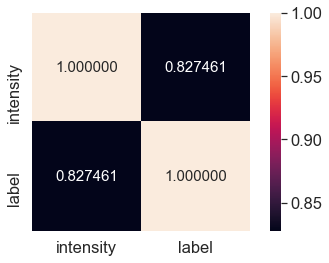

In [21]:
cols_view = ['intensity','label']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '2f',
                 annot_kws = {'size' : 15},
                 xticklabels = cols_view,
                 yticklabels = cols_view
                )

plt.tight_layout()
plt.show

In [22]:
corr = (Row_df.corr(method = 'pearson'))
corr

,189.88,190.26,190.65,191.03,191.42,191.8,192.19,192.57,192.96,193.34,...,890.45,890.74,891.04,891.33,891.63,891.92,892.22,892.51,892.8,label
189.88,1.000000,1.000000,1.000000,0.064203,0.055062,0.024286,0.012108,-0.082813,-0.009373,0.034624,...,0.031930,0.031739,0.033447,0.032101,0.032179,0.031018,0.027930,0.024814,0.025932,0.049622
190.26,1.000000,1.000000,1.000000,0.064203,0.055062,0.024286,0.012108,-0.082813,-0.009373,0.034624,...,0.031930,0.031739,0.033447,0.032101,0.032179,0.031018,0.027930,0.024814,0.025932,0.049622
190.65,1.000000,1.000000,1.000000,0.064203,0.055062,0.024286,0.012108,-0.082813,-0.009373,0.034624,...,0.031930,0.031739,0.033447,0.032101,0.032179,0.031018,0.027930,0.024814,0.025932,0.049622
191.03,0.064203,0.064203,0.064203,1.000000,0.028147,0.021206,0.005255,-0.061661,0.040644,-0.029665,...,0.012347,0.017223,0.018068,0.014986,0.018236,0.012709,0.017029,0.020581,0.016314,0.064679
191.42,0.055062,0.055062,0.055062,0.028147,1.000000,0.031158,-0.027971,0.024079,-0.019334,-0.033698,...,0.020182,0.012866,0.013916,0.019446,0.016068,0.013784,0.014594,0.016216,0.009879,0.027512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.92,0.031018,0.031018,0.031018,0.012709,0.013784,0.079629,-0.042058,0.063639,-0.003790,-0.013313,...,0.990557,0.993824,0.995199,0.995554,0.994564,1.000000,0.994685,0.993730,0.994098,0.834644
892.22,0.027930,0.027930,0.027930,0.017029,0.014594,0.089326,-0.049659,0.061857,-0.008536,-0.016603,...,0.991347,0.994581,0.995813,0.995072,0.995103,0.994685,1.000000,0.994284,0.994103,0.833705
892.51,0.024814,0.024814,0.024814,0.020581,0.016216,0.078928,-0.049883,0.063945,-0.005416,-0.014298,...,0.990853,0.993622,0.994475,0.994463,0.994437,0.993730,0.994284,1.000000,0.994079,0.825699
892.8,0.025932,0.025932,0.025932,0.016314,0.009879,0.080680,-0.050597,0.061162,-0.005310,-0.019165,...,0.990578,0.993677,0.994965,0.995048,0.994856,0.994098,0.994103,0.994079,1.000000,0.827461


In [23]:
corr_lable =corr['label']
corr_lable

189.88    0.049622
190.26    0.049622
190.65    0.049622
191.03    0.064679
191.42    0.027512
            ...   
891.92    0.834644
892.22    0.833705
892.51    0.825699
892.8     0.827461
label     1.000000
Name: label, Length: 2049, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

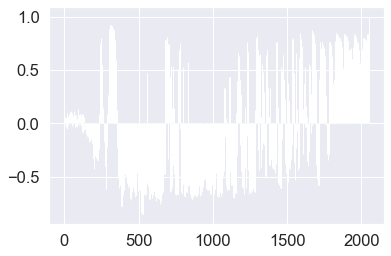

In [24]:
x=np.arange(len(corr_lable.index))
y =list(corr_lable.values)
plt.bar(x,y,color='green')
plt.show

2000 * 2000 그릴 자신이 없어서 밑에는 포기

In [25]:
#cols_view = wave_num
#cols_view.append('label')
#sns.set(font_scale = 1.5)
#hm = sns.heatmap(corr.values,
#                 cbar = True,
#                 annot = True,
#                 square = True,
#                 #fmt = '2f',
#                 #annot_kws = {'size' : 15},
#                 #xticklabels = cols_view,
#                 #yticklabels = cols_view
#                )

#plt.tight_layout()
#plt.show

In [26]:
lst_abs = corr['label']
lst_abs = list(map(abs,lst_abs))
wave_corr_dataset = lst_abs

In [27]:
wave_corr_df = pd.DataFrame(data = wave_corr_dataset, columns=["peason"])
wave_corr_df.describe()

,peason
count,2049.000000
mean,0.462718
std,0.251398
min,0.000065
25%,0.248541
50%,0.524611
75%,0.661810
max,1.000000


In [28]:
wave_corr_df #label행 포함

,peason
0,0.049622
1,0.049622
2,0.049622
3,0.064679
4,0.027512
...,...
2044,0.834644
2045,0.833705
2046,0.825699
2047,0.827461


In [29]:
wave_corr_df =wave_corr_df.drop(2048)#label 행 제거
wave_corr_df.index = wave_num
wave_corr_df

,peason
189.88,0.049622
190.26,0.049622
190.65,0.049622
191.03,0.064679
191.42,0.027512
...,...
891.63,0.833067
891.92,0.834644
892.22,0.833705
892.51,0.825699


# 상관계수가 높은 파장을 20개 순위별로 뽑기

In [30]:
print(wave_corr_df.peason.nlargest(20,keep = 'all')) #동순위 취급
#데이터프레임.nlargest(n, columns, keep='first')

308.73    0.920246
308.36    0.919773
307.61    0.918734
307.98    0.918606
309.10    0.918426
309.48    0.916117
307.23    0.914942
309.85    0.913955
306.86    0.913024
310.23    0.912060
306.48    0.911350
310.60    0.909135
306.11    0.907203
305.74    0.904184
310.97    0.904151
311.35    0.896330
314.34    0.888257
313.96    0.887524
314.71    0.886998
313.59    0.885799
Name: peason, dtype: float64


In [31]:
wave_corr_df

,peason
189.88,0.049622
190.26,0.049622
190.65,0.049622
191.03,0.064679
191.42,0.027512
...,...
891.63,0.833067
891.92,0.834644
892.22,0.833705
892.51,0.825699


In [32]:
np_abs_df = pd.DataFrame(wave_corr_df['peason'].apply(lambda x : x*255))
np_abs_df

,peason
189.88,12.653684
190.26,12.653684
190.65,12.653684
191.03,16.493046
191.42,7.015471
...,...
891.63,212.432091
891.92,212.834178
892.22,212.594876
892.51,210.553353


# 상관계수의 분포를 이미지로 확인하기

In [33]:
ls_abs = list(np_abs_df['peason'])

In [34]:
my_img = []
for i in range (0,1000):
    my_img.append(ls_abs)
my_img = np.array(my_img)

In [35]:
my_img #2048 * 100

array([[ 12.65368446,  12.65368446,  12.65368446, ..., 212.59487581,
        210.55335265, 211.00245086],
       [ 12.65368446,  12.65368446,  12.65368446, ..., 212.59487581,
        210.55335265, 211.00245086],
       [ 12.65368446,  12.65368446,  12.65368446, ..., 212.59487581,
        210.55335265, 211.00245086],
       ...,
       [ 12.65368446,  12.65368446,  12.65368446, ..., 212.59487581,
        210.55335265, 211.00245086],
       [ 12.65368446,  12.65368446,  12.65368446, ..., 212.59487581,
        210.55335265, 211.00245086],
       [ 12.65368446,  12.65368446,  12.65368446, ..., 212.59487581,
        210.55335265, 211.00245086]])

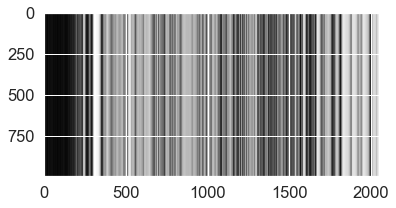

In [36]:
plt.imshow(my_img,cmap="gray") #그레이 스케일

# 흑백반전

주의 사항 : x축의 index는 파장과 무관함
간격 또한 데이터와 무관하게 일정하게 그림
분포 파악하는 데에만 사용하기

In [37]:
np_abs_df2 = pd.DataFrame(wave_corr_df['peason'].apply(lambda x : (1-x)*255))
ls_abs2 = list(np_abs_df2['peason'])
reverse_img = []
for i in range (0,1000):
    reverse_img.append(ls_abs2)
reverse_img = np.array(reverse_img)

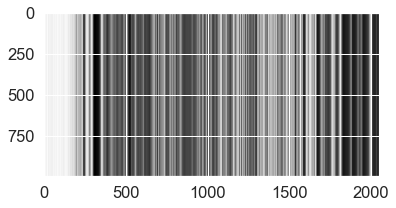

In [38]:
plt.imshow(reverse_img,cmap="gray") #그레이 스케일

In [44]:
np.shape(reverse_img)

(1000, 2048)

In [56]:
reverse_img = reverse_img.astype('uint8')

In [55]:
img = cv2.imread('image.png',cv2.IMREAD_GRAYSCALE)
(img)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# Canny_Edge를 통해 픽셀값이 급격하게 변하는 지점을 구해보자

상관계수의 Canny_Edge

In [58]:
import cv2
dst = cv2.Canny(reverse_img, 50, 200, None, 3) #canny 처리하기

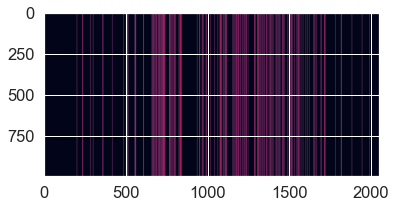

In [60]:
plt.imshow(dst)

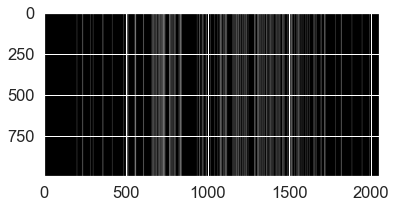

In [67]:
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR) #흑백 
plt.imshow(cdst)

## 308.73 데이터 CannyEdge 분석

In [253]:
df

,wave,intensity
1,189.88,"[589.815, 484.4909, 531.3016, 526.6205, 507.89..."
2,190.26,"[589.815, 484.4909, 531.3016, 526.6205, 507.89..."
3,190.65,"[589.815, 484.4909, 531.3016, 526.6205, 507.89..."
4,191.03,"[475.1288, 425.9775, 418.9559, 514.9178, 519.5..."
5,191.42,"[409.5938, 437.6802, 360.4425, 421.2964, 411.9..."
...,...,...
2044,891.63,"[613.2203, 617.9014, 589.815, 594.4961, 592.15..."
2045,891.92,"[578.1123, 613.2203, 594.4961, 585.1339, 552.3..."
2046,892.22,"[620.2419, 568.7502, 594.4961, 566.4097, 557.0..."
2047,892.51,"[561.7286, 535.9827, 603.8582, 580.4529, 650.6..."


In [254]:
#308.73
len(list(df[df['wave']==308.73]['intensity'])[0])

610

In [221]:
new_df= pd.DataFrame(df[df['wave']==308.73]['intensity'])
new_df

,intensity
314,"[545.3448, 566.4097, 554.707, 512.5773, 540.66..."


In [247]:
#308.73
#np_308= np.array(list(df[df['wave']==308.73]['intensity'])[0]).astype('uint8')
lst_308 = (list(new_df['intensity'])[0][:609])

In [249]:
img_308 = []
for i in range (0,100):
    img_308.append(lst_308)

In [250]:
np_308=np.array(img_308).astype('uint8')
np_308

array([[ 33,  54,  42, ..., 211,  39,  68],
       [ 33,  54,  42, ..., 211,  39,  68],
       [ 33,  54,  42, ..., 211,  39,  68],
       ...,
       [ 33,  54,  42, ..., 211,  39,  68],
       [ 33,  54,  42, ..., 211,  39,  68],
       [ 33,  54,  42, ..., 211,  39,  68]], dtype=uint8)

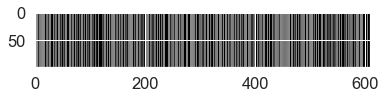

In [263]:
import cv2
dst = cv2.Canny(np_308, 50, 200, None, 3) #canny 처리하기
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR) #흑백 ---->컬러 선을 빨갛게 보이기 위
plt.imshow(cdst)